In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from pymongo.mongo_client import MongoClient
from pymongo.server_api import ServerApi

import os
from dotenv import load_dotenv # add this line

import json

from scipy import stats
from scipy import special
from statsmodels.stats.proportion import proportions_ztest

In [7]:
# Python program to read
# json file
 
import json
 
# Opening JSON file
f = open("cpd_experiment_results.json")
 
# returns JSON object as 
# a dictionary
data = json.load(f)

f.close()

In [8]:
exp_df = pd.DataFrame(list(data))
exp_df = pd.concat([exp_df.drop(['data'], axis=1), exp_df['data'].apply(pd.Series)], axis=1)
exp_df = pd.concat([exp_df.drop(['trials'], axis=1), exp_df['trials'].apply(pd.Series)], axis=1)

In [9]:
exp_df = exp_df[[4, 7, 6, 8, 9]]

exp_df = pd.concat([exp_df.drop([4], axis=1), exp_df[4].apply(pd.Series)], axis=1)
exp_df = exp_df.rename(columns={"stimulus_type": "stimulus_category"})
exp_df = pd.concat([exp_df.drop([7], axis=1), exp_df[7].apply(pd.Series)], axis=1)

In [10]:
exp_df = exp_df[[6,8,9, 'stimulus_category', 'response']]
exp_df = exp_df.rename(columns={"response": "response_cp"})


In [11]:
exp_df

,6,8,9,stimulus_category,response_cp
0,"{'rt': 12481, 'stimulus': '<div style='float: ...","{'rt': 8161, 'stimulus': '<div style='float: l...","{'rt': 11213, 'response': {'Climate': 7, 'Free...",freeze,{'Q0': ' Yes'}
1,"{'rt': 7623, 'stimulus': '<div style='float: c...","{'rt': 18197, 'stimulus': '<div style='float: ...","{'rt': 13998, 'response': {'Temperature': 6, '...",temp,{'Q0': ' Not sure'}
2,"{'rt': 20606, 'stimulus': '<div style='float: ...","{'rt': 9607, 'stimulus': '<div style='float: l...","{'rt': 22528, 'response': {'Climate': 9, 'Free...",freeze,{'Q0': ' Yes'}
3,"{'rt': 12450, 'stimulus': '<div style='float: ...","{'rt': 14156, 'stimulus': '<div style='float: ...","{'rt': 14464, 'response': {'Temperature': 3, '...",freeze,{'Q0': ' Yes'}
4,"{'rt': 11198, 'stimulus': '<div style='float: ...","{'rt': 18812, 'stimulus': '<div style='float: ...","{'rt': 16647, 'response': {'Freeze': 6, 'Atten...",temp,{'Q0': ' No'}
...,...,...,...,...,...
393,"{'rt': 41990, 'stimulus': '<div style='float: ...","{'rt': 168094, 'stimulus': '<div style='float:...","{'rt': 120825, 'response': {'Temperature': 8, ...",freeze,{'Q0': ' Yes'}
394,"{'rt': 3107, 'stimulus': '<div style='float: c...","{'rt': 5735, 'stimulus': '<div style='float: l...","{'rt': 7110, 'response': {'Freeze': 5, 'Attent...",freeze,{'Q0': ' Not sure'}
395,"{'rt': 28780, 'stimulus': '<div style='float: ...","{'rt': 44298, 'stimulus': '<div style='float: ...","{'rt': 75414, 'response': {'Freeze': 2, 'Tempe...",temp,{'Q0': ' No'}
396,"{'rt': 19714, 'stimulus': '<div style='float: ...","{'rt': 19254, 'stimulus': '<div style='float: ...","{'rt': 23656, 'response': {'Climate': 9, 'Free...",freeze,{'Q0': ' Not sure'}


In [12]:
exp_df = pd.concat([exp_df.drop([8], axis=1), exp_df[8].apply(pd.Series)], axis=1)
exp_df = exp_df[[6, 9, 'rt', 'response', 'stimulus_category', 'response_cp']]
exp_df = exp_df.rename(columns={"response": "response_slider"})
exp_df = exp_df.rename(columns={"rt": "response_time"})
exp_df = pd.concat([exp_df.drop([6], axis=1), exp_df[6].apply(pd.Series)], axis=1)
exp_df = exp_df[[9,'response_time', 'response_slider', 'stimulus_type', 'stimulus_category', 'response_cp']]

In [13]:

exp_df = pd.concat([exp_df.drop([9], axis=1), exp_df[9].apply(pd.Series)], axis=1)
exp_df = exp_df.rename(columns={"response": "response_survey"})
exp_df = exp_df[['response_time','stimulus_type', 'stimulus_category', 'response_cp','response_survey', 'response_slider']]

exp_df = pd.concat([exp_df.drop(['response_survey'], axis=1), exp_df['response_survey'].apply(pd.Series)], axis=1)

# keep only entries where subject was paying attention
exp_df = exp_df[exp_df['Attention'] == 9]
exp_df = exp_df[exp_df['response_time'] >= 2000]

In [14]:
exp_df['response_cp'] = [answer['Q0'] for answer in exp_df['response_cp']]

In [15]:
exp_df['correlation'] = exp_df['stimulus_type'].str.extract('(\d+\.\d+)', expand=False).astype(float)

In [16]:
exp_df.dropna(axis = 1, inplace = True, how = 'all')
exp_df.dropna(axis = 0, inplace = True, how = 'all')

In [17]:
exp_df

,response_time,stimulus_type,stimulus_category,response_cp,response_slider,Climate,Freeze,Attention,Temperature,correlation
0,8161,../img/plots/binary_0.230878804398407_.png,freeze,Yes,1983,7,7,9,7,0.230879
1,18197,../img/plots/continuous_0.44278258556149_.png,temp,Not sure,1947,5,5,9,6,0.442783
2,9607,../img/plots/binary_0.659323805510727_.png,freeze,Yes,1973,9,9,9,9,0.659324
3,14156,../img/plots/binary_0.44278258556149_.png,freeze,Yes,1996,5,3,9,3,0.442783
4,18812,../img/plots/continuous_0.659323805510727_.png,temp,No,1983,6,6,9,6,0.659324
...,...,...,...,...,...,...,...,...,...,...
392,11212,../img/plots/continuous_0.230878804398407_.png,temp,Yes,1979,7,6,9,5,0.230879
394,5735,../img/plots/binary_0.230878804398407_.png,freeze,Not sure,1971,6,5,9,7,0.230879
395,44298,../img/plots/continuous_0.230878804398407_.png,temp,No,1999,2,2,9,2,0.230879
396,19254,../img/plots/binary_0.659323805510727_.png,freeze,Not sure,1973,9,9,9,9,0.659324


In [34]:
exp_freeze_df = exp_df[exp_df['stimulus_category'] == 'freeze']
exp_temp_df = exp_df[exp_df['stimulus_category'] == 'temp']

In [35]:
len(exp_freeze_df)

207

In [36]:
len(exp_temp_df)

185

In [37]:
exp_df = pd.concat([exp_freeze_df, exp_temp_df], axis = 0)

In [38]:
exp_freeze_df.describe()

,response_time,response_slider,Climate,Freeze,Attention,Temperature,correlation
count,207.000000,207.000000,207.000000,207.000000,207.0,207.000000,207.000000
mean,26065.946860,1974.734300,6.676329,6.714976,9.0,6.705314,0.443148
std,23351.357976,10.935465,2.001594,1.830411,0.0,1.605549,0.166868
min,5360.000000,1940.000000,0.000000,0.000000,9.0,1.000000,0.230879
25%,13606.500000,1970.000000,6.000000,6.000000,9.0,6.000000,0.230879
50%,19279.000000,1973.000000,7.000000,7.000000,9.0,7.000000,0.442783
75%,30292.000000,1983.000000,8.000000,8.000000,9.0,8.000000,0.659324
max,230262.000000,2005.000000,9.000000,9.000000,9.0,9.000000,0.659324


In [39]:
exp_temp_df.describe()

,response_time,response_slider,Climate,Freeze,Attention,Temperature,correlation
count,185.000000,185.000000,185.000000,185.000000,185.0,185.000000,185.000000
mean,29783.762162,1980.951351,5.913514,5.518919,9.0,5.810811,0.457212
std,24384.363993,15.643891,2.072879,2.080165,0.0,2.011351,0.183096
min,4310.000000,1945.000000,0.000000,0.000000,9.0,0.000000,0.230879
25%,15024.000000,1971.000000,5.000000,4.000000,9.0,5.000000,0.230879
50%,22854.000000,1979.000000,6.000000,6.000000,9.0,6.000000,0.442783
75%,33485.000000,1998.000000,7.000000,7.000000,9.0,7.000000,0.659324
max,136518.000000,2009.000000,9.000000,9.000000,9.0,9.000000,0.659324


In [46]:
pval_list = []

freeze_counts = exp_freeze_df['response_cp'].sort_values().value_counts().sort_index(ascending=False)
temp_counts =  exp_temp_df['response_cp'].sort_values().value_counts().sort_index(ascending=False) 
for i in range(len(freeze_counts)):
    count_freeze = freeze_counts.iloc[i]
    count_temp = temp_counts.iloc[i]
    nobs_freeze = sum(exp_freeze_df['response_cp'].sort_values().value_counts())
    nobs_temp = sum(exp_temp_df['response_cp'].sort_values().value_counts())
    count = np.array([count_freeze, count_temp])
    nobs = np.array([nobs_freeze, nobs_temp])
    stat, pval = proportions_ztest(count, nobs)
    print('{0:0.3f}'.format(pval))
    pval_list.append(pval)

0.001
0.041
0.011


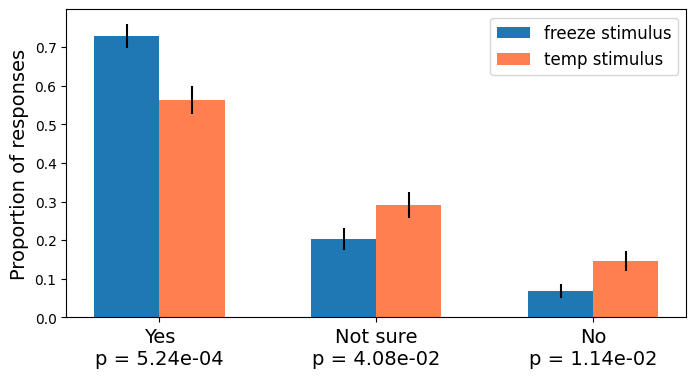

In [52]:
data_freeze = freeze_counts/ nobs_freeze
data_temp = temp_counts / nobs_temp
temp_err = np.sqrt(data_temp*(1-data_temp)/len(exp_temp_df['response_cp']))
freeze_err = np.sqrt(data_freeze*(1-data_freeze)/len(exp_freeze_df['response_cp']))

# Position of bars on x-axis
N=3
width = 0.3  

ind = np.arange(N)
plt.figure(figsize=(8,4))
     
plt.bar(ind, data_freeze, width, yerr = freeze_err, color = "tab:blue", label='freeze stimulus')
plt.bar(ind + width, data_temp, width, yerr = temp_err, color = "coral", label='temp stimulus')

#plt.title("Participants' responses on whether they identified a changepoint")
plt.ylabel("Proportion of responses", fontsize=14)
plt.xticks(ind + width / 2, ('Yes\np = ' + '{:0.2e}'.format(pval_list[0]), 'Not sure\np = ' + '{:0.2e}'.format(pval_list[1]), 'No\np = ' + '{:0.2e}'.format(pval_list[2])), fontsize=14)
plt.legend(fontsize=12)
plt.show()


In [110]:
data_freeze

response_cp
 Yes         0.729469
 Not sure    0.202899
 No          0.067633
Name: count, dtype: float64

In [111]:
data_temp

response_cp
 Yes         0.562162
 Not sure    0.291892
 No          0.145946
Name: count, dtype: float64

In [45]:
pval_list = []

freeze_counts = exp_freeze_df['response_cp'].sort_values().value_counts()
temp_counts =  exp_temp_df['response_cp'].sort_values().value_counts()
for i in range(len(freeze_counts)):
    count_freeze = freeze_counts.iloc[i]
    count_temp = temp_counts.iloc[i]
    nobs_freeze = sum(exp_freeze_df['response_cp'].sort_values().value_counts())
    nobs_temp = sum(exp_temp_df['response_cp'].sort_values().value_counts())
    count = np.array([count_freeze, count_temp])
    nobs = np.array([nobs_freeze, nobs_temp])
    stat, pval = proportions_ztest(count, nobs)
    print('{0:0.3f}'.format(pval))
    pval_list.append(pval)

0.001
0.041
0.011


In [112]:
count_freeze = exp_freeze_df['response_cp'].sort_values().value_counts()[0]
count_temp = exp_temp_df['response_cp'].sort_values().value_counts()[0]
nobs_freeze = sum(exp_freeze_df['response_cp'].sort_values().value_counts())
nobs_temp = sum(exp_temp_df['response_cp'].sort_values().value_counts())
count = np.array([count_freeze, count_temp])
nobs = np.array([nobs_freeze, nobs_temp])
stat, pval = proportions_ztest(count, nobs)
print('{0:0.3f}'.format(pval))

0.001


C:\Users\grace\AppData\Local\Temp\ipykernel_372\1389854183.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count_freeze = exp_freeze_df['response_cp'].sort_values().value_counts()[0]
C:\Users\grace\AppData\Local\Temp\ipykernel_372\1389854183.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count_temp = exp_temp_df['response_cp'].sort_values().value_counts()[0]


In [113]:
count_freeze = exp_freeze_df['response_cp'].sort_values().value_counts()[2]
count_temp = exp_temp_df['response_cp'].sort_values().value_counts()[2]
nobs_freeze = sum(exp_freeze_df['response_cp'].sort_values().value_counts())
nobs_temp = sum(exp_temp_df['response_cp'].sort_values().value_counts())
count = np.array([count_freeze, count_temp])
nobs = np.array([nobs_freeze, nobs_temp])
stat, pval = proportions_ztest(count, nobs)
print('{0:0.3f}'.format(pval))

0.011


C:\Users\grace\AppData\Local\Temp\ipykernel_372\1338090552.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count_freeze = exp_freeze_df['response_cp'].sort_values().value_counts()[2]
C:\Users\grace\AppData\Local\Temp\ipykernel_372\1338090552.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count_temp = exp_temp_df['response_cp'].sort_values().value_counts()[2]


C:\Users\grace\AppData\Local\Temp\ipykernel_18328\253746887.py:57: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


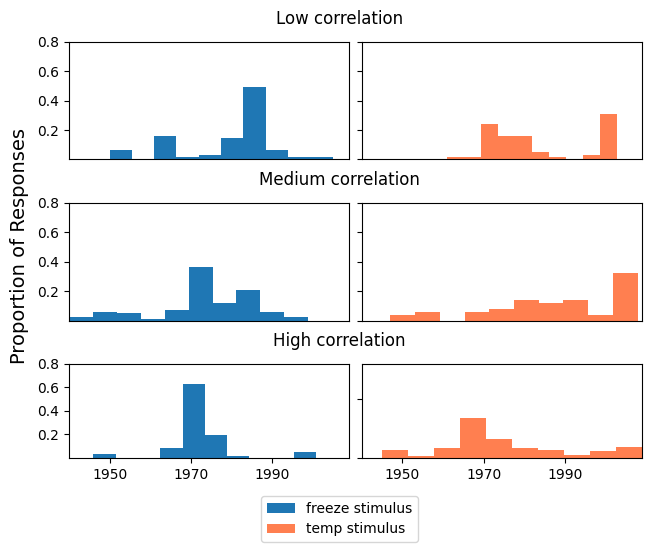

In [65]:
low_cor_df = exp_df.loc[exp_df['correlation'] < 0.3]
mid_cor_df = exp_df.loc[(exp_df['correlation'] >= 0.3) & (exp_df['correlation'] < 0.5)]
high_cor_df = exp_df.loc[(exp_df['correlation'] >= 0.5) & (exp_df['correlation'] < 0.7)]

freeze_cp_list = []
temp_cp_list = []

freeze_cp_list.append(low_cor_df[low_cor_df['stimulus_category'] == 'freeze']['response_slider'])
temp_cp_list.append(low_cor_df[low_cor_df['stimulus_category'] == 'temp']['response_slider'])

freeze_cp_list.append(mid_cor_df[mid_cor_df['stimulus_category'] == 'freeze']['response_slider'])
temp_cp_list.append(mid_cor_df[mid_cor_df['stimulus_category'] == 'temp']['response_slider'])

freeze_cp_list.append(high_cor_df[high_cor_df['stimulus_category'] == 'freeze']['response_slider'])
temp_cp_list.append(high_cor_df[high_cor_df['stimulus_category'] == 'temp']['response_slider'])

fig = plt.figure(constrained_layout=True)
# fig.suptitle('Histogram of Changepoint Year Identified by Participants')

subfigs = fig.subfigures(3)
i = 0

fig.add_subplot(111, frameon=False)
plt.grid(False)

row_titles = ['Low correlation', 'Medium correlation', 'High correlation']
for row, subfig in enumerate(subfigs):
    subfig.suptitle(row_titles[row])
    axs = subfig.subplots(nrows=1, ncols=2)
        
    axs[0].hist(freeze_cp_list[row], weights=np.ones_like(freeze_cp_list[row]) / len(freeze_cp_list[row]), color = "tab:blue", label = "freeze stimulus")
    axs[1].hist(temp_cp_list[row], weights=np.ones_like(temp_cp_list[row]) / len(temp_cp_list[row]),  color = "coral", label = "temp stimulus")
    
    if (row < 2):
        axs[0].tick_params(labelbottom=False, bottom=False)
        axs[1].tick_params(labelbottom=False, bottom=False)
    
    axs[0].tick_params(labelleft=True, left=True)
    axs[1].tick_params(labelleft=False, left=True)
        
    ylim =  0.8
    axs[0].set_ylim(0, ylim)
    axs[1].set_ylim(0, ylim)
    axs[0].set_xlim(1940, 2009)
    axs[1].set_xlim(1940, 2009)
    axs[0].set_xticks([1950, 1970, 1990])
    axs[1].set_xticks([1950, 1970, 1990])
    axs[0].set_yticks([0.2, 0.4, 0.6, 0.8])
#     if (row == 2):
#         axs[0].set_xlabel("Freeze Stimulus", fontsize=12)
#         axs[1].set_xlabel("Temp Stimulus", fontsize=12)


subfigs[2].legend(loc = 'lower center', bbox_to_anchor=(0.5, -0.4))
fig.supylabel('Proportion of Responses', fontsize=14)

fig.show()

## Get Entropy

In [66]:
def freqs(x):
    counts = np.bincount(x, minlength=6)[1:]
    return counts/counts.sum()

In [67]:
cp_freq_freeze = np.apply_along_axis(freqs, axis=0, arr=exp_freeze_df['response_slider'])[1939:]
cp_freq_temp = np.apply_along_axis(freqs, axis=0, arr=exp_temp_df['response_slider'])[1939:]

In [68]:
print("Entropy of freeze responses: " + str(stats.entropy(cp_freq_freeze)))
print("Entropy of temp responses: " + str(stats.entropy(cp_freq_temp)))

Entropy of freeze responses: 3.1486079800476943
Entropy of temp responses: 3.557791511616188


# KS test

In [118]:
stats.ks_2samp(exp_freeze_df['response_slider'], exp_temp_df['response_slider'])

KstestResult(statistic=0.28003655829742785, pvalue=2.900024821765046e-07, statistic_location=1985, statistic_sign=1)

# F test

In [70]:
# https://www.geeksforgeeks.org/how-to-perform-an-f-test-in-python/
# Calculate the sample variances
variance1 = np.var(exp_freeze_df['response_slider'])
variance2 = np.var(exp_temp_df['response_slider'])
print("var freeze: " + str(variance1))
print("var temp: " + str(variance2))
# Calculate the F-statistic
f_value = variance1 / variance2
 
# Calculate the degrees of freedom
df1 = len(exp_freeze_df['response_slider']) - 1
df2 = len(exp_temp_df['response_slider']) - 1
 
# Calculate the p-value
p_value = stats.f.cdf(f_value, df1, df2)
 
# Print the results
print('Degree of freedom 1:',df1)
print('Degree of freedom 2:',df2)
print("F-statistic:", f_value)
print("p-value:", p_value)

var freeze: 119.00669793927503
var temp: 243.40844411979563
Degree of freedom 1: 206
Degree of freedom 2: 184
F-statistic: 0.4889177052571965
p-value: 3.4270460680052496e-07


# Levene test

In [120]:
stats.levene(exp_freeze_df['response_slider'], exp_temp_df['response_slider'])

LeveneResult(statistic=31.917546449788258, pvalue=3.106895218130121e-08)

# Shapiro-Wilk Test

In [121]:
stats.shapiro(low_cor_df[low_cor_df['stimulus_category'] == 'freeze']['response_slider'])

ShapiroResult(statistic=0.8326188921928406, pvalue=5.942323468843824e-07)

In [122]:
stats.shapiro(low_cor_df[low_cor_df['stimulus_category'] == 'temp']['response_slider'])

ShapiroResult(statistic=0.8236629366874695, pvalue=3.949157587612717e-07)

In [123]:
stats.shapiro(mid_cor_df[mid_cor_df['stimulus_category'] == 'freeze']['response_slider'])

ShapiroResult(statistic=0.9234997034072876, pvalue=0.00011512568744365126)

In [124]:
stats.shapiro(mid_cor_df[mid_cor_df['stimulus_category'] == 'temp']['response_slider'])

ShapiroResult(statistic=0.9134705066680908, pvalue=0.0013805527705699205)

In [125]:
stats.shapiro(high_cor_df[high_cor_df['stimulus_category'] == 'freeze']['response_slider'])

ShapiroResult(statistic=0.6711536645889282, pvalue=1.6532349100817356e-10)

In [126]:
stats.shapiro(high_cor_df[high_cor_df['stimulus_category'] == 'temp']['response_slider'])

ShapiroResult(statistic=0.927863359451294, pvalue=0.00044399304897524416)

In [127]:
stats.shapiro(exp_freeze_df['response_slider'])

ShapiroResult(statistic=0.9497426748275757, pvalue=1.2239466968821944e-06)

In [128]:
stats.shapiro(exp_temp_df['response_slider'])

ShapiroResult(statistic=0.9533693790435791, pvalue=8.930684998631477e-06)

# Analyze survey

In [129]:
exp_temp_grouped_df = exp_temp_df.groupby('correlation')
exp_temp_grouped_df['Climate'].describe()

,count,mean,std,min,25%,50%,75%,max
correlation,,,,,,,,
0.230879,62.0,5.322581,2.252679,0.0,4.00,6.0,7.0,9.0
0.442783,50.0,5.640000,1.924705,0.0,4.25,6.0,7.0,9.0
0.659324,73.0,6.602740,1.823761,2.0,6.00,7.0,8.0,9.0


In [130]:
exp_freeze_grouped_df = exp_freeze_df.groupby('correlation')
exp_freeze_grouped_df['Climate'].describe()

,count,mean,std,min,25%,50%,75%,max
correlation,,,,,,,,
0.230879,63.0,6.333333,2.207027,1.0,5.50,7.0,8.0,9.0
0.442783,82.0,6.487805,1.982914,0.0,5.25,7.0,8.0,9.0
0.659324,62.0,7.274194,1.680840,2.0,6.25,8.0,9.0,9.0


C:\Users\grace\AppData\Local\Temp\ipykernel_372\2490974198.py:61: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


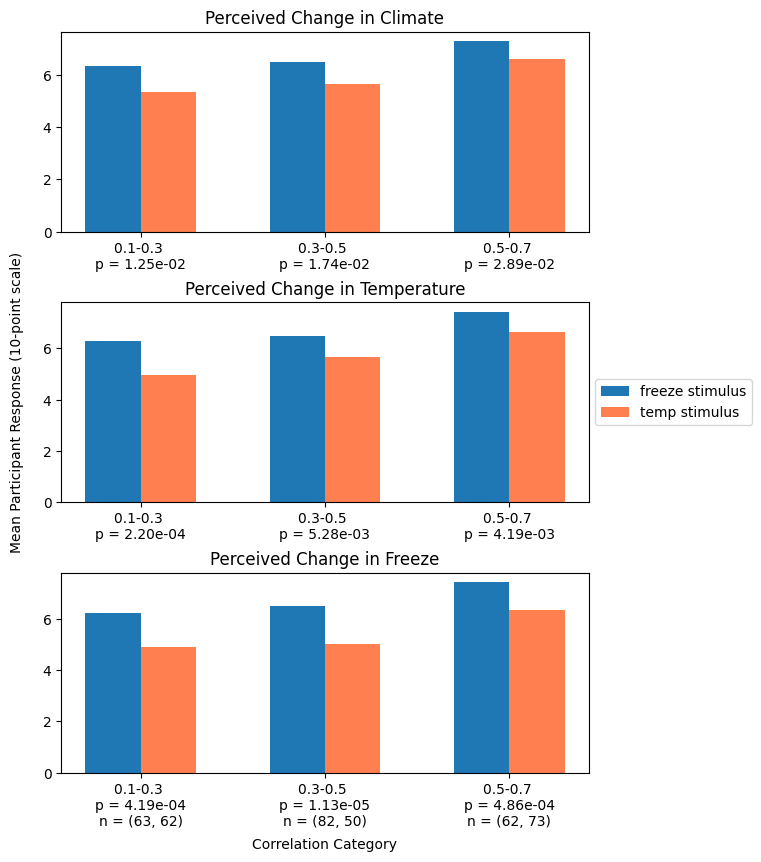

In [131]:
low_cor_df = exp_df.loc[exp_df['correlation'] < 0.3]
mid_cor_df = exp_df.loc[(exp_df['correlation'] >= 0.3) & (exp_df['correlation'] < 0.5)]
high_cor_df = exp_df.loc[(exp_df['correlation'] >= 0.5) & (exp_df['correlation'] < 0.7)]

question_categories = ['Climate', 'Temperature', 'Freeze']
fig, axs = plt.subplots(3, figsize = (6, 8))
fig.tight_layout(h_pad = 3)
i = 0

fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)

for cat in question_categories:
    
    mean_diff_freeze_list = []
    mean_diff_temp_list = []
    p_value_list = []
    freeze_sample_size_list = []
    temp_sample_size_list = []

    mean_diff_freeze_list.append(low_cor_df[low_cor_df['stimulus_category'] == 'freeze'][cat].mean())
    mean_diff_temp_list.append(low_cor_df[low_cor_df['stimulus_category'] == 'temp'][cat].mean())
    p_value_list.append(stats.ttest_ind(low_cor_df[low_cor_df['stimulus_category'] == 'freeze'][cat], low_cor_df[low_cor_df['stimulus_category'] == 'temp'][cat])[1])
    temp_sample_size_list.append(len(low_cor_df[low_cor_df['stimulus_category'] == 'temp'][cat]))
    freeze_sample_size_list.append(len(low_cor_df[low_cor_df['stimulus_category'] == 'freeze'][cat]))
    
    mean_diff_freeze_list.append(mid_cor_df[mid_cor_df['stimulus_category'] == 'freeze'][cat].mean())
    mean_diff_temp_list.append(mid_cor_df[mid_cor_df['stimulus_category'] == 'temp'][cat].mean())
    p_value_list.append(stats.ttest_ind(mid_cor_df[mid_cor_df['stimulus_category'] == 'freeze'][cat], mid_cor_df[mid_cor_df['stimulus_category'] == 'temp'][cat])[1])
    temp_sample_size_list.append(len(mid_cor_df[mid_cor_df['stimulus_category'] == 'temp'][cat]))
    freeze_sample_size_list.append(len(mid_cor_df[mid_cor_df['stimulus_category'] == 'freeze'][cat]))
    
    mean_diff_freeze_list.append(high_cor_df[high_cor_df['stimulus_category'] == 'freeze'][cat].mean())
    mean_diff_temp_list.append(high_cor_df[high_cor_df['stimulus_category'] == 'temp'][cat].mean())
    p_value_list.append(stats.ttest_ind(high_cor_df[high_cor_df['stimulus_category'] == 'freeze'][cat], high_cor_df[high_cor_df['stimulus_category'] == 'temp'][cat])[1])
    temp_sample_size_list.append(len(high_cor_df[high_cor_df['stimulus_category'] == 'temp'][cat]))
    freeze_sample_size_list.append(len(high_cor_df[high_cor_df['stimulus_category'] == 'freeze'][cat]))

    N = 3
    ind = np.arange(N)

    # Width of a bar 
    width = 0.3 

    axs[i].bar(ind, mean_diff_freeze_list, width, color = "tab:blue", label = "freeze stimulus")
    axs[i].bar(ind + width, mean_diff_temp_list, width, color = "coral", label = "temp stimulus")
    axs[i].set_title('Perceived Change in ' + cat)
    axs[i].set_xticks(ind + width / 2, (('0.1-0.3 \np = ' + '{:0.2e}'.format(p_value_list[0])), 
                                        ('0.3-0.5 \np = ' + '{:0.2e}'.format(p_value_list[1])), 
                                        ('0.5-0.7 \np = ' + '{:0.2e}'.format(p_value_list[2]))))
    i += 1
axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axs[2].set_xticks(ind + width / 2, (('0.1-0.3 \np = ' + '{:0.2e}'.format(p_value_list[0]) + '\nn = (' + str(freeze_sample_size_list[0]) + ", " + str(temp_sample_size_list[0]) + ')'), 
                                        ('0.3-0.5 \np = ' + '{:0.2e}'.format(p_value_list[1]) + '\nn = (' + str(freeze_sample_size_list[1]) + ", " + str(temp_sample_size_list[1]) + ')'), 
                                        ('0.5-0.7 \np = ' + '{:0.2e}'.format(p_value_list[2]) + '\nn = (' + str(freeze_sample_size_list[2]) + ", " + str(temp_sample_size_list[2]) + ')')))
plt.ylabel('Mean Participant Response (10-point scale)')
plt.xlabel('Correlation Category', labelpad=30)

fig.show()

# Analyze survey by CP response

In [132]:
exp_no_cp_df = exp_df[exp_df['response_cp'] == ' No']
exp_cp_df = exp_df[exp_df['response_cp'] == ' Yes']

print("Mean Climate Response (yes CP): " + str(exp_cp_df['Climate'].mean()))
print("Mean Climate Response (no CP): " + str(exp_no_cp_df['Climate'].mean()))
print(stats.ttest_ind(exp_cp_df['Climate'], exp_no_cp_df['Climate']))

Mean Climate Response (yes CP): 6.647058823529412
Mean Climate Response (no CP): 5.0
TtestResult(statistic=4.812714920528329, pvalue=2.384329876050406e-06, df=294.0)


In [133]:
exp_temp_no_cp_df = exp_temp_df[exp_temp_df['response_cp'] == ' No']
exp_temp_cp_df = exp_temp_df[exp_temp_df['response_cp'] == ' Yes']

print("Mean Climate Response (yes CP): " + str(exp_temp_cp_df['Climate'].mean()))
print("Mean Climate Response (no CP): " + str(exp_temp_no_cp_df['Climate'].mean()))
print(stats.ttest_ind(exp_temp_cp_df['Climate'], exp_temp_no_cp_df['Climate']))

Mean Climate Response (yes CP): 6.211538461538462
Mean Climate Response (no CP): 5.111111111111111
TtestResult(statistic=2.4068576168652887, pvalue=0.017507023930227614, df=129.0)


In [134]:
exp_freeze_no_cp_df = exp_freeze_df[exp_freeze_df['response_cp'] == ' No']
exp_freeze_cp_df = exp_freeze_df[exp_freeze_df['response_cp'] == ' Yes']

print("Mean Climate Response (yes CP): " + str(exp_freeze_cp_df['Climate'].mean()))
print("Mean Climate Response (no CP): " + str(exp_freeze_no_cp_df['Climate'].mean()))
print(stats.ttest_ind(exp_freeze_cp_df['Climate'], exp_freeze_no_cp_df['Climate']))

Mean Climate Response (yes CP): 6.947019867549669
Mean Climate Response (no CP): 4.785714285714286
TtestResult(statistic=4.0190740473785125, pvalue=8.908353666078948e-05, df=163.0)
